# Data Science - Assignment 1

Dataset: <b>Heart Disease</b>

Thomas Bründl

se21m032

# Data Description

1. (age) : age in years    
2. (sex) : sex (1 = male; 0 = female)
3. (cp) : chest pain type <br>
            &emsp; &emsp; Value 1: typical angina <br>
            &emsp; &emsp; Value 2: atypical angina <br>
            &emsp; &emsp; Value 3: non-anginal pain <br>
            &emsp; &emsp; Value 4: asymptomatic <br> 
4. (trestbps) : resting blood pressure (in mm Hg on admission to the 
        hospital)
5. (chol) : serum cholestoral in mg/dl     
6. (fbs) : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
7. (restecg) : resting electrocardiographic results <br>
        &emsp; &emsp; Value 0: normal <br> 
        &emsp; &emsp; Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV) <br>
        &emsp; &emsp; Value 2: showing probable or definite left ventricular hypertrophy 
                    by Estes' criteria <br>
8. (thalach) : maximum heart rate achieved
9. (exang) : exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak) : ST depression induced by exercise relative to rest
11. (slope) : the slope of the peak exercise ST segment <br>
        &emsp; &emsp; Value 1: upsloping <br>
        &emsp; &emsp; Value 2: flat <br>
        &emsp; &emsp; Value 3: downsloping <br>
12. (ca) : number of major vessels (0-3) colored by flourosopy     
13. (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect   
14. (num) : diagnosis of heart disease (angiographic disease status) <br>
         &emsp; &emsp; Value 0: < 50% diameter narrowing <br>
         &emsp; &emsp; Value 1: > 50% diameter narrowing <br> &emsp; &emsp; (in any major vessel: attributes 59 through 68 are vessels) <br>

# Import necessary dependencies

In [495]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and concat raw data

In [496]:
columnNames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# dataDict = {
#   "age": {"catData": None},
#   "sex": {"catData": {1: "Male", 0: "Female"}},
#   "cp": {"catData": {1: "typical angina",2: "atypical angina", 3: "non-anginal pain", 4 : "asymptomatic" }},
#   "trestbps" :  {"catData": None},
#   "chol" :  {"catData": None},
#   "fbs" :   {"catData": {1: True, 0: False}},
#   "restecg": {"catData": {1: "normal",2: "having ST-T wave abnormality", 3: "showing probable"}},
#   "thalach": {"catData": None},
#   "exang": {"catData": {1: "yes", 0: "no"}},
#   "oldpeak": {"catData": None},
#   "slope": {"catData": {1: "upsloping",2: "flat", 3: "downsloping"}},
#   "ca": {"catData": None},
#   "thal": {"catData": {3: "normal", 6: "fixed defect", 7: "reversable defect"}},
#   "num": {"catData": {0: "< 50% diameter narrowing", 1: "> 50% diameter narrowing"}},
# } 

raw_data_cleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columnNames)
raw_data_hungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columnNames)
raw_data_switzerland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columnNames)
raw_data_va = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columnNames)

raw_data = pd.concat([raw_data_cleveland, raw_data_hungarian, raw_data_switzerland, raw_data_va])
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)


print('columns: ' + str(len(raw_data)))




# # Only examine processed data with a subset of 14 attributes

# columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# cleveland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columns)
# hungarian_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columns)
# switzerland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columns)
# va_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columns)

# raw_data = pd.concat([cleveland_raw_data, hungarian_raw_data, switzerland_raw_data, va_raw_data])

# # re-shuffle records just to randomize data points
# raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)
# raw_data.head()

columns: 920


# Show raw data

In [497]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

raw_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1
5,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0


## Parsing data

In [498]:
data=raw_data

def parseToFloat(y):
    try:
        return float(y)
    except:
        return None

def processColumn(data, column, isFloat=False):
    if not isFloat:
        data[column] = data[column].apply(lambda value: parseToFloat(value))
    else:
        data[column] = data[column].apply(lambda value: parseToFloat(value)) 

for columnName in columnNames:
    processColumn(data=raw_data, column=columnName)

# Map description to number value

In [499]:
dataDict = {
  "age": {"catData": None},
  "sex": {"catData": {1: "Male", 0: "Female"}},
  "cp": {"catData": {1: "typical angina",2: "atypical angina", 3: "non-anginal pain", 4 : "asymptomatic" }},
  "trestbps" :  {"catData": None},
  "chol" :  {"catData": None},
  "fbs" :   {"catData": {1: True, 0: False}},
  "restecg": {"catData": {1: "normal",2: "having ST-T wave abnormality", 3: "showing probable"}},
  "thalach": {"catData": None},
  "exang": {"catData": {1: "yes", 0: "no"}},
  "oldpeak": {"catData": None},
  "slope": {"catData": {1: "upsloping",2: "flat", 3: "downsloping"}},
  "ca": {"catData": None},
  "thal": {"catData": {3: "normal", 6: "fixed defect", 7: "reversable defect"}},
  "num": {"catData": {0: "< 50% diameter narrowing", 1: "> 50% diameter narrowing"}},
} 

newData = data

def applyCatData(numData, colName):
    
    

    for key in dataDict[colName]["catData"]:
          # print("-------------")
          # print(key)
          # print(numData)
          # print(dataDict[colName]["catData"][key])
          if key == numData:
                # print("check:: ")
                # print(dataDict[colName]["catData"][key])
                return dataDict[colName]["catData"][key]

    return None




for colName in dataDict:
    if None != dataDict[colName]["catData"]:
        newData[colName] =  newData[colName].apply(lambda numData: applyCatData(numData, colName))





In [500]:

pd.options.display.max_columns = None
pd.options.display.max_rows = None
newData.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,Male,atypical angina,120.0,166.0,False,None,180.0,no,0.0,None,NaN,None,< 50% diameter narrowing
1,45.0,Male,atypical angina,140.0,224.0,True,None,122.0,no,0.0,None,NaN,None,< 50% diameter narrowing
2,48.0,Male,asymptomatic,160.0,329.0,False,None,92.0,yes,1.5,flat,NaN,None,> 50% diameter narrowing
3,59.0,Male,asymptomatic,164.0,176.0,True,having ST-T wave abnormality,90.0,no,1.0,flat,2.0,fixed defect,None
4,40.0,Female,asymptomatic,150.0,392.0,False,None,130.0,no,2.0,flat,NaN,fixed defect,> 50% diameter narrowing
5,65.0,Female,non-anginal pain,155.0,269.0,False,None,148.0,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing
6,34.0,Male,typical angina,140.0,156.0,False,None,180.0,no,0.0,None,NaN,None,> 50% diameter narrowing
7,57.0,Male,asymptomatic,160.0,0.0,None,None,98.0,yes,2.0,flat,NaN,reversable defect,None
8,49.0,Male,typical angina,130.0,0.0,False,normal,145.0,no,3.0,flat,NaN,None,None
9,69.0,Female,typical angina,140.0,239.0,False,None,151.0,no,1.8,upsloping,2.0,normal,< 50% diameter narrowing


In [501]:
# data=raw_data

# ### Helper functions

# def roundElementToIntSafe(y):
#     try:
#         return int(float(y))
#     except:
#         return None

# def roundToInt(x):
#     return x.apply(lambda value: roundElementToIntSafe(value))

# def parseFloatElementSafe(y):
#     try:
#         return float(y)
#     except:
#         return None

# def parseFloat(x):
#     return x.apply(lambda value: parseFloatElementSafe(value)) 


# ### Parse columns, assign categories, remove invalid records

# numericalColumns = []
# categoryColumns = []
# numericalCategoryColumns = []

# def processColumn(data, column, isFloat=False, categoryMapping=None, categories=None):

#     # Parse
#     if not isFloat:
#         data[column] = roundToInt(data[column])
#     else:
#         data[column] = parseFloat(data[column])

#     # (optional) Filter records that contain one or more invalid columns
#     #data = data.drop(data[data[column].isnull()].index)

#     # Append to global array
#     if categoryMapping is None:
#         numericalColumns.append(column)
#     else:
#         numericalCategoryColumns.append(column)
#         categoryColumn = column + '_cat'
#         categoryColumns.append(categoryColumn)
#         data[categoryColumn] = data[column].apply(categoryMapping)
    	
#         # (optional) Filter records that contain one or more invalid columns
#         #data = data.drop(data[data[categoryColumn].isnull()].index)

#         # Add category
#         data[categoryColumn] = pd.Categorical(data[categoryColumn], categories=categories)

#     return data

# # age
# processColumn(data=data, column='age')

# # sex
# data = processColumn(data=data, column='sex',
# categoryMapping=(lambda value: 'male' if value == 1 else 'female' if value == 0 else None), 
# categories=['male', 'female'])

# # chest pain type
# data = processColumn(data=data, column='cp',
# categoryMapping=(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value == 2 else 'non-anginal pain' if value == 3 else 'asymptomatic' if value == 4 else None), 
# categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])

# #  resting blood pressure (in mm Hg on admission to the hospital) 
# data = processColumn(data=data, column='trestbps')

# # serum cholestoral in mg/dl 
# data = processColumn(data=data, column='chol')
# # Fix chol = 0
# data['chol'] = data['chol'].apply(lambda value: value if value > 0 else None)

# # fasting blood sugar > 120 mg/dl
# data = processColumn(data=data, column='fbs',
# categoryMapping=(lambda value: 'True' if value == 1 else 'False' if value == 0 else None), 
# categories=['True', 'False'])

# # resting electrocardiographic results
# data = processColumn(data=data, column='restecg',
# categoryMapping=(lambda value: 'normal' if value == 0 else 'abnormality' if value == 1 else 'hypertrophy' if value == 2 else None),
# categories=['normal', 'abnormality', 'hypertrophy'])

# # maximum heart rate achieved 
# data = processColumn(data=data, column='thalach')

# # exercise induced angina
# data = processColumn(data=data, column='exang',
# categoryMapping=(lambda value: 'Yes' if value == 1 else 'No' if value == 0 else None),
# categories=['Yes', 'No'])

# # ST depression induced by exercise relative to rest 
# data = processColumn(data=data, column='oldpeak', isFloat=True)

# # slope of the peak exercise ST segment
# data = processColumn(data=data, column='slope',
# categoryMapping=(lambda value: 'upsloping' if value == 1 else 'flat' if value == 2 else 'downsloping' if value == 3 else None), 
# categories=['upsloping', 'flat', 'downsloping'])

# # number of major vessels (0-3) colored by flourosopy
# data = processColumn(data=data, column='ca')

# # thal
# data = processColumn(data=data, column='thal',
# categoryMapping=(lambda value: 'normal' if value == 3 else 'fixed defect' if value == 6 else 'reversable defect' if value == 7 else None),
# categories=['normal', 'fixed defect', 'reversable defect'])

# # diagnosis of heart disease (angiographic disease status)
# data = processColumn(data=data, column='num',
# categoryMapping=(lambda value: '< 50% diameter narrowing' if value == 0 else '> 50% diameter narrowing' if value == 1 else None), 
# categories=['< 50% diameter narrowing', '> 50% diameter narrowing'])

# data.head()



# Multivariate Analysis

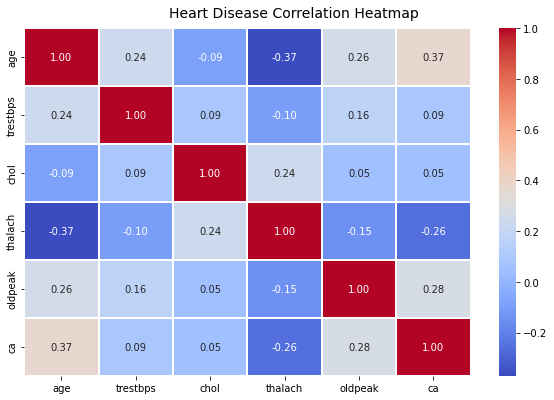

In [502]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease Correlation Heatmap', fontsize=14)

In [503]:

pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,Male,atypical angina,120.0,166.0,False,None,180.0,no,0.0,None,NaN,None,< 50% diameter narrowing
1,45.0,Male,atypical angina,140.0,224.0,True,None,122.0,no,0.0,None,NaN,None,< 50% diameter narrowing
2,48.0,Male,asymptomatic,160.0,329.0,False,None,92.0,yes,1.5,flat,NaN,None,> 50% diameter narrowing
3,59.0,Male,asymptomatic,164.0,176.0,True,having ST-T wave abnormality,90.0,no,1.0,flat,2.0,fixed defect,None
4,40.0,Female,asymptomatic,150.0,392.0,False,None,130.0,no,2.0,flat,NaN,fixed defect,> 50% diameter narrowing
5,65.0,Female,non-anginal pain,155.0,269.0,False,None,148.0,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Interpretation:
  In the heatmap as well as in the pairwise plots, a correlation between age and thalach is observed.


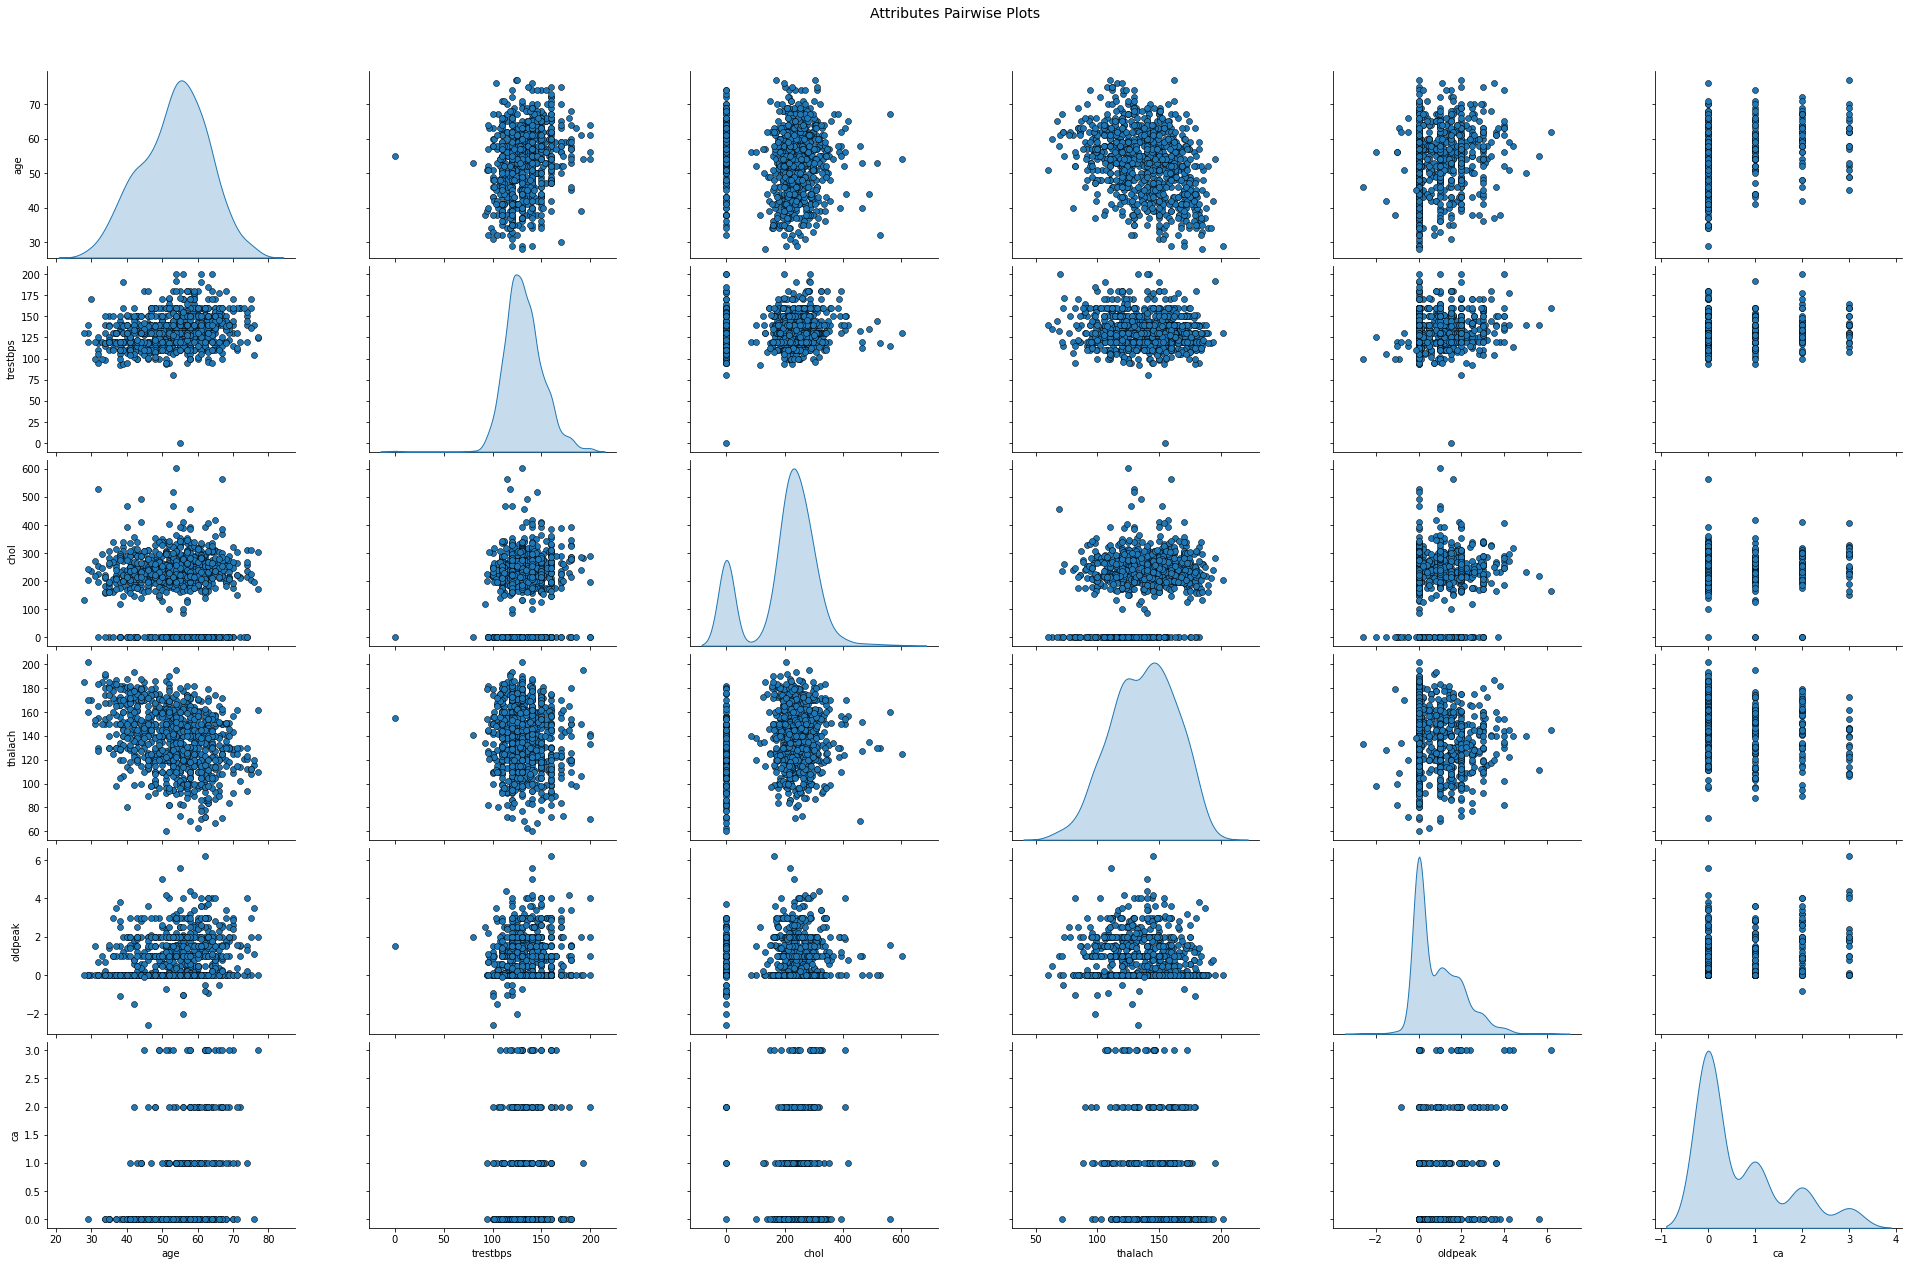

In [504]:
# cols = numericalColumns
cols = columnNames
cols =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
# cols = ['age', 'sex']
print(columnNames)

pp = sns.pairplot(data[cols], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

print("Interpretation:")
print("  In the heatmap as well as in the pairwise plots, a correlation between age and thalach is observed.")


# Match features with raw data

In [505]:
# ### Fix colums types
# data = raw_data

# # sex
# data['sex'] = data['sex'].apply(lambda value: 'male' if value == 1 else 'female')
# data['sex'] = pd.Categorical(data['sex'], categories=['male', 'female'])

# # chest pain type
# data['cp'] = data['cp'].apply(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value == 2 else 'non-anginal pain' if value == 3 else 'asymptomatic')

# # fasting blood sugar > 120 mg/dl
# data['fbs'] = data['fbs'].apply(lambda value: 'True' if value == 1 else 'False')

# # resting electrocardiographic results
# data['restecg'] = data['restecg'].apply(lambda value: 'normal' if value == 0 else 'abnormality' if value == 1 else 'hypertrophy')

# # exercise induced angina
# data['exang'] = data['exang'].apply(lambda value: 'Yes' if value == 1 else 'No')

# # slope of the peak exercise ST segment
# data['slope'] = data['slope'].apply(lambda value: 'upsloping' if value == 1 else 'flat' if value == 2 else 'downsloping')

# # thal
# data['thal'] = data['thal'].apply(lambda value: 'normal' if value == 3 else 'fixed defect' if value == 6 else 'reversable defect')

# # diagnosis of heart disease (angiographic disease status)
# data['num'] = data['num'].apply(lambda value: '< 50% diameter narrowing' if value == 0 else '> 50% diameter narrowing')